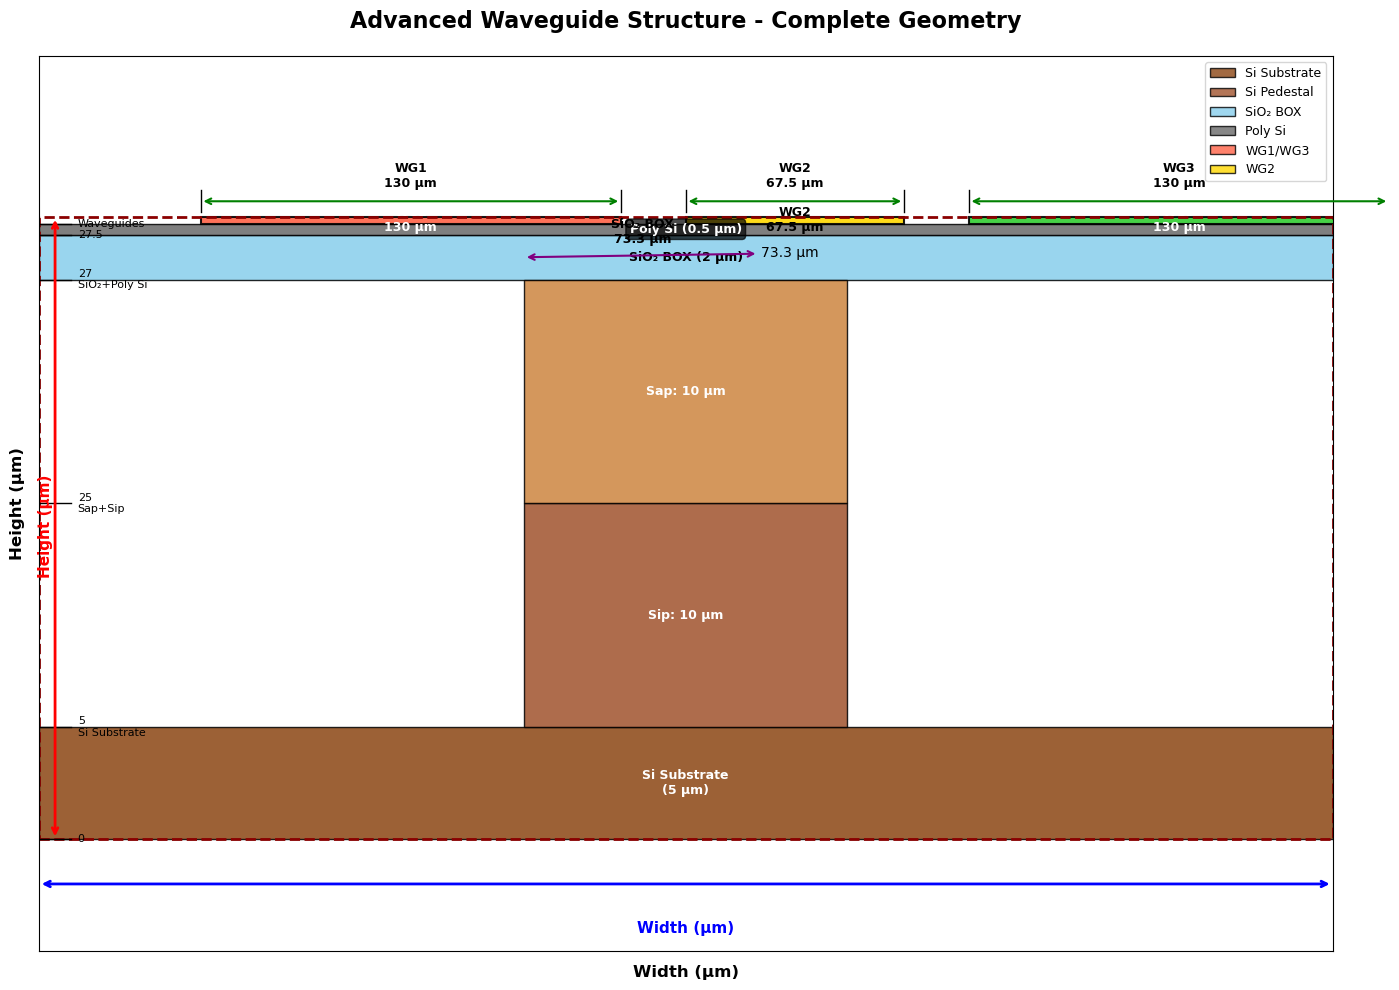

WAVEGUIDE STRUCTURE SUMMARY
Layer Stack (from bottom to top):
1. Si Substrate: 5 µm
2. Sip layer: 10 µm
3. Sap layer: 10 µm
4. SiO₂ BOX: 2 µm
5. Poly Si: 0.5 µm

Waveguides:
   WG1: 130 µm width
   WG2: 67.5 µm width
   WG3: 130 µm width

Total Height: 27.8 µm
Total Width: 400 µm


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Set up the figure with a professional style
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Define colors for different materials (professional color scheme)
colors = {
    'Si Substrate': '#8B4513',        # Brown for silicon substrate
    'Sip': '#A0522D',                 # SaddleBrown for Si pedestal
    'Sap': '#CD853F',                 # Peru for Si pedestal
    'SiO₂ BOX': '#87CEEB',            # Light blue for oxide
    'Poly Si': '#696969',             # DimGray for polysilicon
    'WG1': '#FF6347',                 # Tomato red for waveguide 1
    'WG2': '#FFD700',                 # Gold for waveguide 2
    'WG3': '#32CD32'                  # LimeGreen for waveguide 3
}

# Layer heights and positions (in microns)
layers = {
    'Si Substrate': {'height': 5, 'y_position': 0, 'width': 400},
    'Sip': {'height': 10, 'y_position': 5, 'width': 100, 'x_offset': 150},
    'Sap': {'height': 10, 'y_position': 15, 'width': 100, 'x_offset': 150},
    'SiO₂ BOX': {'height': 2, 'y_position': 25, 'width': 400},
    'Poly Si': {'height': 0.5, 'y_position': 27, 'width': 400},
    'Waveguides': {'height': 0.3, 'y_position': 27.5}
}

# Waveguide specifications
waveguides = {
    'WG1': {'width': 130, 'x_position': 50, 'color': colors['WG1']},
    'WG2': {'width': 67.5, 'x_position': 200, 'color': colors['WG2']},
    'WG3': {'width': 130, 'x_position': 287.5, 'color': colors['WG3']}
}

# Draw the main substrate layers
for layer_name, props in layers.items():
    if layer_name in ['Si Substrate', 'SiO₂ BOX', 'Poly Si']:
        rect = patches.Rectangle(
            (0, props['y_position']), 
            props['width'], 
            props['height'],
            linewidth=1, 
            edgecolor='black',
            facecolor=colors[layer_name],
            alpha=0.85
        )
        ax.add_patch(rect)
        
        # Add layer label
        label_text = f"{layer_name}\n({props['height']} µm)" if layer_name == 'Si Substrate' else layer_name
        if layer_name == 'SiO₂ BOX':
            label_text = "SiO₂ BOX (2 µm)"
        elif layer_name == 'Poly Si':
            label_text = "Poly Si (0.5 µm)"
            
        ax.text(
            props['width']/2, 
            props['y_position'] + props['height']/2,
            label_text,
            ha='center', 
            va='center',
            fontsize=9,
            color='white' if layer_name in ['Si Substrate', 'Poly Si'] else 'black',
            weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7) if layer_name == 'Poly Si' else None
        )

# Draw Sip and Sap layers (special positioned layers)
for layer_name in ['Sip', 'Sap']:
    props = layers[layer_name]
    rect = patches.Rectangle(
        (props['x_offset'], props['y_position']),
        props['width'],
        props['height'],
        linewidth=1,
        edgecolor='black',
        facecolor=colors[layer_name],
        alpha=0.85
    )
    ax.add_patch(rect)
    
    # Add layer label
    label_text = f"{layer_name}: {props['height']} µm"
    ax.text(
        props['x_offset'] + props['width']/2,
        props['y_position'] + props['height']/2,
        label_text,
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        weight='bold'
    )

# Draw the waveguides
wg_y = layers['Waveguides']['y_position']
for wg_name, props in waveguides.items():
    rect = patches.Rectangle(
        (props['x_position'], wg_y),
        props['width'],
        layers['Waveguides']['height'],
        linewidth=1.5,
        edgecolor='black',
        facecolor=props['color'],
        alpha=0.9
    )
    ax.add_patch(rect)
    
    # Add waveguide label
    ax.text(
        props['x_position'] + props['width']/2,
        wg_y + layers['Waveguides']['height']/2,
        f"{wg_name}\n{props['width']} µm",
        ha='center',
        va='center',
        fontsize=9,
        color='white' if wg_name in ['WG1', 'WG3'] else 'black',
        weight='bold'
    )

# Add dimension lines and annotations
# Height scale on the left side
ax.annotate('', 
            xy=(5, 0), 
            xytext=(5, 27.8),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(2, 14, 'Height (µm)', 
        ha='center', va='center', fontsize=11, color='red', rotation=90, weight='bold')

# Add specific height markers
height_marks = [0, 5, 15, 25, 27, 27.5]
height_labels = ['0', '5\nSi Substrate', '25\nSap+Sip', '27\nSiO₂+Poly Si', '27.5', 'Waveguides']
for i, (h, label) in enumerate(zip(height_marks, height_labels)):
    ax.plot([0, 10], [h, h], 'k-', lw=1)
    ax.text(12, h, label, ha='left', va='center', fontsize=8)

# Width scale at the bottom
ax.annotate('', 
            xy=(0, -2), 
            xytext=(400, -2),
            arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
ax.text(200, -4, 'Width (µm)', 
        ha='center', va='center', fontsize=11, color='blue', weight='bold')

# Add specific width markers for waveguides
wg_positions = [
    (50, 130, 'WG1\n130 µm'),
    (200, 67.5, 'WG2\n67.5 µm'),
    (287.5, 130, 'WG3\n130 µm')
]

for x, width, label in wg_positions:
    ax.plot([x, x], [28, 29], 'k-', lw=1)
    ax.plot([x+width, x+width], [28, 29], 'k-', lw=1)
    ax.annotate('', 
                xy=(x, 28.5), 
                xytext=(x+width, 28.5),
                arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
    ax.text(x + width/2, 29, label, ha='center', va='bottom', fontsize=9, weight='bold')

# Add the BOX width annotation
ax.annotate('73.3 µm', 
            xy=(150, 26), 
            xytext=(223.3, 26),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(186.65, 26.5, 'SiO₂ BOX\n73.3 µm', ha='center', va='bottom', fontsize=9, weight='bold')

# Configure the plot appearance
ax.set_xlim(0, 400)
ax.set_ylim(-5, 35)
ax.set_xlabel('Width (µm)', fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel('Height (µm)', fontsize=12, weight='bold', labelpad=10)

# Add title
ax.set_title('Advanced Waveguide Structure - Complete Geometry', 
             fontsize=16, weight='bold', pad=20)

# Remove ticks for cleaner look but add a grid
ax.set_xticks([])
ax.set_yticks([])
ax.grid(True, alpha=0.2, linestyle='--', color='gray')

# Add a legend for materials
legend_elements = [
    patches.Patch(facecolor=colors['Si Substrate'], alpha=0.8, edgecolor='black', label='Si Substrate'),
    patches.Patch(facecolor=colors['Sip'], alpha=0.8, edgecolor='black', label='Si Pedestal'),
    patches.Patch(facecolor=colors['SiO₂ BOX'], alpha=0.8, edgecolor='black', label='SiO₂ BOX'),
    patches.Patch(facecolor=colors['Poly Si'], alpha=0.8, edgecolor='black', label='Poly Si'),
    patches.Patch(facecolor=colors['WG1'], alpha=0.8, edgecolor='black', label='WG1/WG3'),
    patches.Patch(facecolor=colors['WG2'], alpha=0.8, edgecolor='black', label='WG2')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)

# Add border around the entire structure
total_rect = patches.Rectangle((0, 0), 400, 27.8, linewidth=2, 
                              edgecolor='darkred', facecolor='none', linestyle='--')
ax.add_patch(total_rect)

plt.tight_layout()
plt.show()

# Print summary of the structure
print("="*50)
print("WAVEGUIDE STRUCTURE SUMMARY")
print("="*50)
print("Layer Stack (from bottom to top):")
print(f"1. Si Substrate: {layers['Si Substrate']['height']} µm")
print(f"2. Sip layer: {layers['Sip']['height']} µm")
print(f"3. Sap layer: {layers['Sap']['height']} µm")
print(f"4. SiO₂ BOX: {layers['SiO₂ BOX']['height']} µm")
print(f"5. Poly Si: {layers['Poly Si']['height']} µm")
print("\nWaveguides:")
for wg_name, props in waveguides.items():
    print(f"   {wg_name}: {props['width']} µm width")
print(f"\nTotal Height: {layers['Waveguides']['y_position'] + layers['Waveguides']['height']:.1f} µm")
print(f"Total Width: 400 µm")
print("="*50)